# Predicting Heart Disease Risk Using Machine Learning Models

### Abstract
This project applies machine learning to the Cleveland Heart Disease dataset to predict the presence of heart disease. Using 303 patient records with clinical and demographic features, we compare Logistic Regression, Random Forest, and K-Nearest Neighbors. The goal is to evaluate model performance and identify the most important predictors for early risk detection.

### Problem Statement
Heart disease is one of the leading causes of mortality worldwide. The task in this project is to use patient health attributes (such as age, cholesterol, blood pressure, and exercise-related measures) to predict the presence of heart disease. Accurate prediction models can support early diagnosis and assist doctors in clinical decision-making.

### Plan
1. **Load & Explore Data** – Inspect dataset size, structure, and class balance.  
2. **Exploratory Data Analysis (EDA)** – Visualize distributions and identify key feature correlations.  
3. **Data Preparation** – Select relevant features and split into train/test sets.  
4. **Model Training** – Build three models: Logistic Regression (baseline), Random Forest (ensemble), and KNN (distance-based).  
5. **Evaluation** – Assess performance using accuracy, confusion matrix, ROC-AUC, and classification report.  
6. **Comparison** – Compare models side by side to identify strengths and trade-offs.  
7. **Conclusion** – Summarize findings, limitations, and clinical implications (with recall being especially important in healthcare).  

**Reproducibility Note:**  
All models were trained with `random_state=42` to ensure consistent results when rerunning the notebook.  

# Load & Explore Data 

In [1]:
# Setup

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/heart_disease_cleveland.csv")
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


**Analysis:** The dataset preview confirms that all expected columns are present, with both patient features and the heart disease outcome variable correctly loaded. This ensures the data has been read properly for further exploration.

# Exploratory Data Analysis (EDA)

In [2]:
# Missing values check
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**Analysis:** The dataset has no missing values, which simplifies preprocessing and ensures we can directly proceed with feature engineering and modeling.

In [3]:
# Data overview

# Basic info about dataset
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
(303, 14)


**Analysis:** The dataset contains 303 rows and 15 columns, each representing clinical features of patients related to heart disease. All columns are either numeric or categorical with limited unique values.

In [4]:
# Summary statistics

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


**Analysis:** The summary statistics show that most patients are middle-aged (around 54 years on average). Cholesterol and blood pressure vary widely, with some extreme high values indicating potential outliers. Max heart rate achieved is typically between 120–160 bpm.

In [5]:
# Renaming columns for clarity

col_mapping = {
    "age": "Age (years)",
    "sex": "Sex (1=male, 0=female)",
    "cp": "Chest pain type (0=typ angina, 1=atyp angina, 2=non-anginal, 3=asymptomatic)",
    "trestbps": "Resting blood pressure (mm Hg)",
    "chol": "Serum cholesterol (mg/dl)",
    "fbs": "Fasting blood sugar > 120 mg/dl (1=true, 0=false)",
    "restecg": "Resting ECG results (0–2)",
    "thalach": "Max heart rate achieved",
    "exang": "Exercise-induced angina (1=yes, 0=no)",
    "oldpeak": "ST depression induced by exercise (relative to rest)",
    "slope": "Slope of the peak exercise ST segment (0–2)",
    "ca": "Number of major vessels (0–3) colored by fluoroscopy",
    "thal": "Thalassemia (3=normal, 6=fixed defect, 7=reversible defect)",
    "target": "Diagnosis of heart disease (1=disease, 0=no disease)",
}

df = df.rename(columns=col_mapping)

# Double check new column names
df.head()

,Age (years),"Sex (1=male, 0=female)","Chest pain type (0=typ angina, 1=atyp angina, 2=non-anginal, 3=asymptomatic)",Resting blood pressure (mm Hg),Serum cholesterol (mg/dl),"Fasting blood sugar > 120 mg/dl (1=true, 0=false)",Resting ECG results (0–2),Max heart rate achieved,"Exercise-induced angina (1=yes, 0=no)",ST depression induced by exercise (relative to rest),Slope of the peak exercise ST segment (0–2),Number of major vessels (0–3) colored by fluoroscopy,"Thalassemia (3=normal, 6=fixed defect, 7=reversible defect)","Diagnosis of heart disease (1=disease, 0=no disease)"
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [6]:
# Helper function to show percentages on countplots

def add_percentages(ax, total=None):
    """
    Add percentage labels on top of bars in a seaborn/matplotlib countplot.
    
    ax    : matplotlib axis (from sns.countplot)
    total : total number of samples (default: sum of bar heights)
    """
    if total is None:
        total = sum([p.get_height() for p in ax.patches])
    
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            percentage = 100 * height / total
            ax.annotate(f'{percentage:.1f}%',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 10), textcoords='offset points')

##### Helper Function for Adding Percentages  
We define a reusable function `add_percentages(ax)` that places percentage labels above each bar in a plot.  

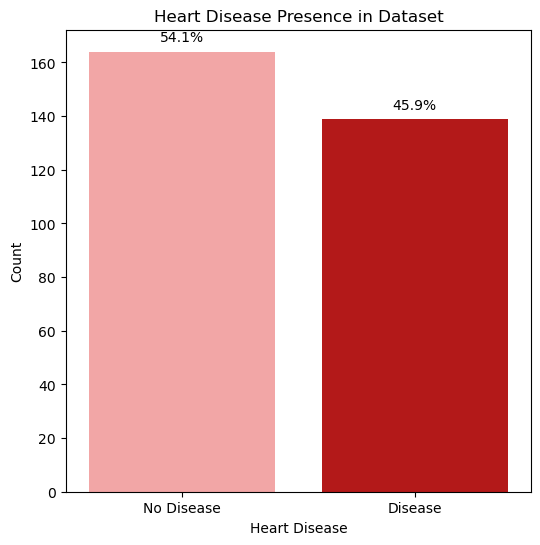

In [7]:
# Heart Disease Presence (Target Distribution with Labels)

# Label column
df["Heart Disease Label"] = df["Diagnosis of heart disease (1=disease, 0=no disease)"].map({
    0: "No Disease",
    1: "Disease"
})

plt.figure(figsize=(6,6))
ax = sns.countplot(
    data=df,
    x="Heart Disease Label",   
    hue="Heart Disease Label", 
    palette=["#FF9999", "#CC0000"],
    legend=False
)

plt.title("Heart Disease Presence in Dataset")
plt.xlabel("Heart Disease")
plt.ylabel("Count")

# Add percentages on top of bars
add_percentages(ax)

plt.show()


**Analysis:** Around 54% of patients have heart disease. The dataset is roughly balanced, so no major bias toward one class.

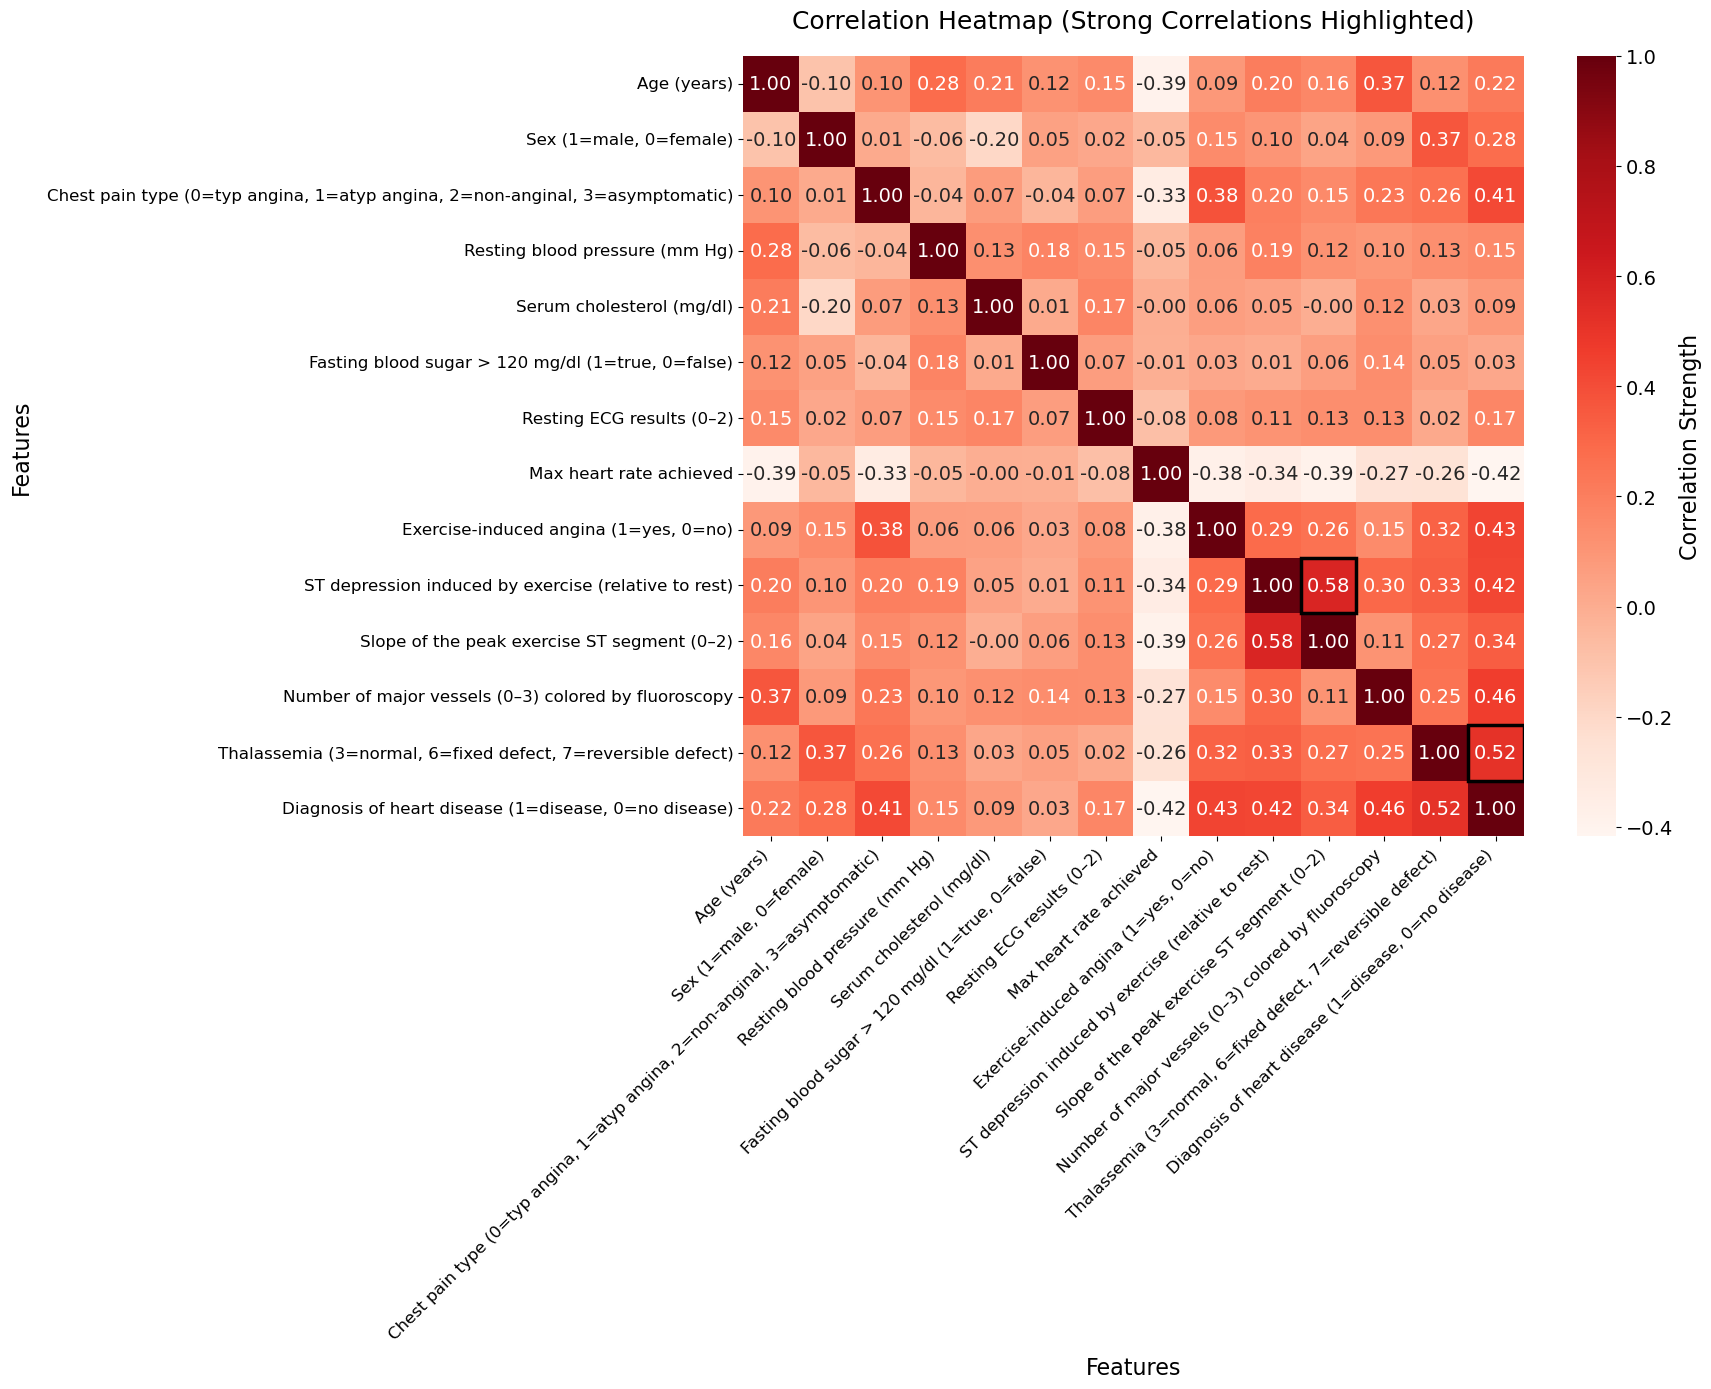

In [8]:
#Coorelation Heatmap

plt.figure(figsize=(18,14))

# 1) Correlation on numeric columns
corr = df.select_dtypes(include="number").corr()

# 2) Heatmap (capture axis as `ax`)
ax = sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    cmap="Reds",
    cbar_kws={'label': 'Correlation Strength'},
    annot_kws={"size": 14},   # numbers inside the boxes
    square=True
)

# 3) Colorbar font sizes
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)          # ticks on the color bar
cbar.set_label("Correlation Strength", fontsize=16)

# 4) Highlight strong correlations (|r| >= 0.5) with bold borders
for i in range(len(corr)):
    for j in range(len(corr)):
        if i < j and abs(corr.iloc[i, j]) >= 0.5:
            edge_color = 'black'  
            ax.add_patch(
                plt.Rectangle((j, i), 1, 1, fill=False, edgecolor=edge_color, lw=2.5)
            )


# 5) Titles & ticks
plt.title("Correlation Heatmap (Strong Correlations Highlighted)", fontsize=18, pad=20)
plt.xlabel("Features", fontsize=16, labelpad=10)
plt.ylabel("Features", fontsize=16, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

**Analysis:** Strongest correlations are seen between chest pain type, ST slope, number of vessels, and target, while cholesterol and fasting blood sugar show weak relationships.

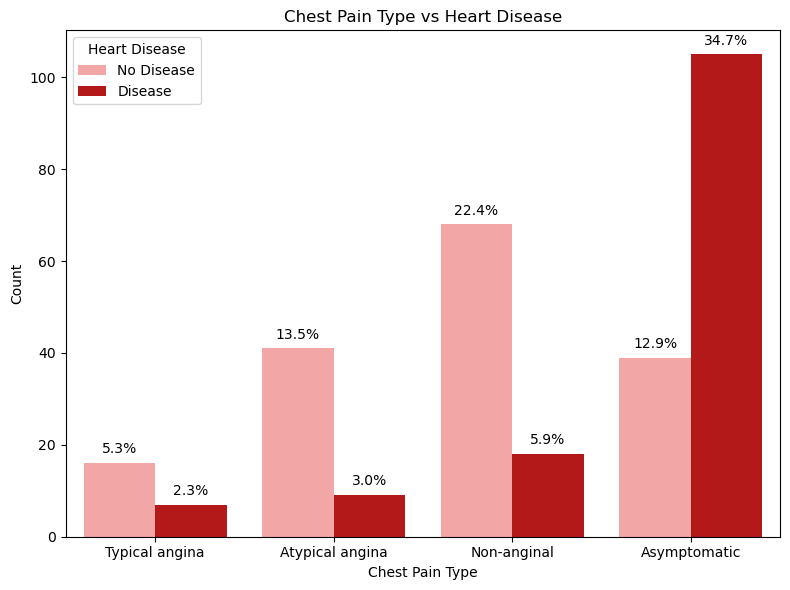

In [9]:
# Chest pain type vs Heart Disease

cp_col = "Chest pain type (0=typ angina, 1=atyp angina, 2=non-anginal, 3=asymptomatic)"

# Ensure numeric
df[cp_col] = pd.to_numeric(df[cp_col], errors="coerce")

plt.figure(figsize=(8,6))
ax = sns.countplot(
    data=df,
    x=cp_col,
    hue="Heart Disease Label",
    palette=["#FF9999", "#CC0000"],
    order=[0,1,2,3]
)

plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")

# Set ticks and labels
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["Typical angina", "Atypical angina", "Non-anginal", "Asymptomatic"])

# Add percentages
add_percentages(ax)

plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

**Analysis:** Patients with asymptomatic chest pain have the highest proportion of heart disease, while those with typical angina mostly show no disease.

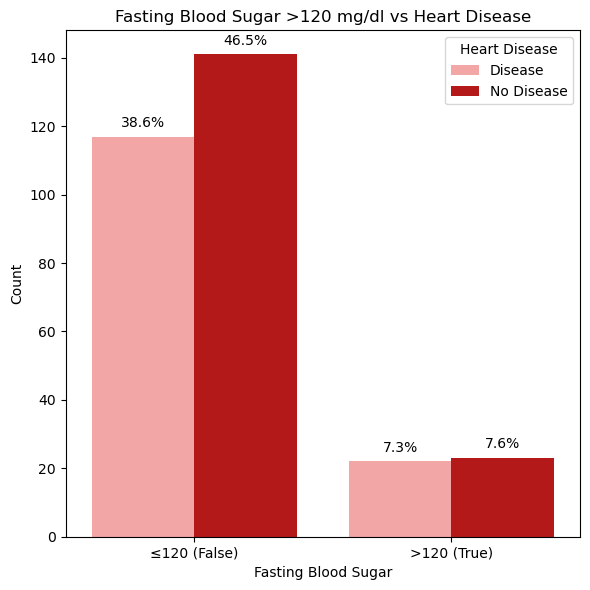

In [10]:
# Fasting Blood Sugar vs Heart Disease
fbs_col = "Fasting blood sugar > 120 mg/dl (1=true, 0=false)"

plt.figure(figsize=(6,6))
ax = sns.countplot(
    data=df,
    x=fbs_col,
    hue="Heart Disease Label",
    palette=["#FF9999", "#CC0000"]
)

plt.title("Fasting Blood Sugar >120 mg/dl vs Heart Disease")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Count")

# Relabel ticks 
tick_labels = ["≤120 (False)", ">120 (True)"]
ax.set_xticks(range(len(tick_labels)))
ax.set_xticklabels(tick_labels)

add_percentages(ax)

plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

**Analysis:** Fasting blood sugar > 120 mg/dl does not show a strong link to heart disease, suggesting it may not be a significant predictor.

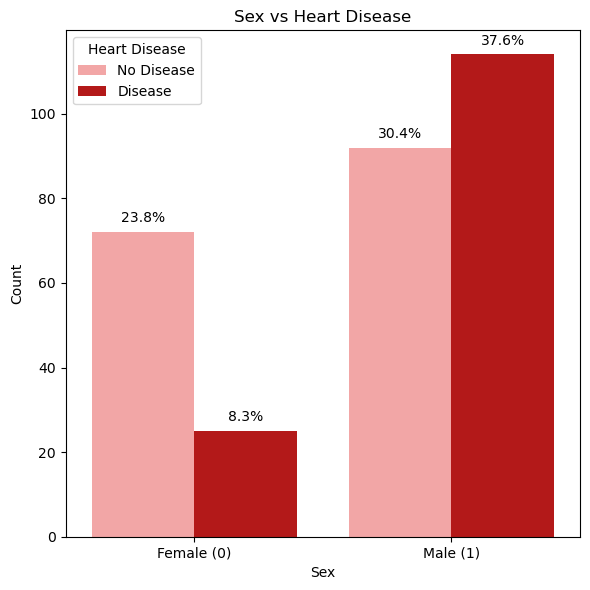

In [11]:
# Sex vs Heart Disease
sex_col = "Sex (1=male, 0=female)"

plt.figure(figsize=(6,6))
ax = sns.countplot(
    data=df,
    x=sex_col,
    hue="Heart Disease Label",
    palette=["#FF9999", "#CC0000"]
)

plt.title("Sex vs Heart Disease")
plt.xlabel("Sex")
plt.ylabel("Count")

# 0=female, 1=male
tick_labels = ["Female (0)", "Male (1)"]
ax.set_xticks(range(len(tick_labels)))
ax.set_xticklabels(tick_labels)

add_percentages(ax)
plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

**Analysis:** Males (37.6%) have a much higher prevalence of heart disease compared to females (8.3%), indicating sex is an important predictor.  

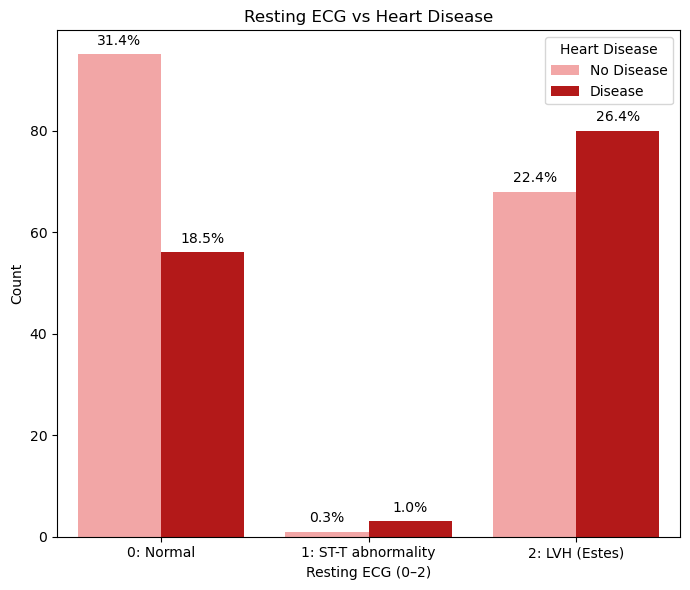

In [12]:
# Resting ECG vs Heart Disease
restecg_col = "Resting ECG results (0–2)"

plt.figure(figsize=(7,6))
ax = sns.countplot(
    data=df,
    x=restecg_col,
    hue="Heart Disease Label",
    palette=["#FF9999", "#CC0000"]
)

plt.title("Resting ECG vs Heart Disease")
plt.xlabel("Resting ECG (0–2)")
plt.ylabel("Count")

tick_labels = ["0: Normal", "1: ST-T abnormality", "2: LVH (Estes)"]
ax.set_xticks(range(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation=0)

add_percentages(ax)
plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

**Analysis:** Patients with abnormal ECG results show a slightly higher proportion of heart disease, but the difference is not very strong.

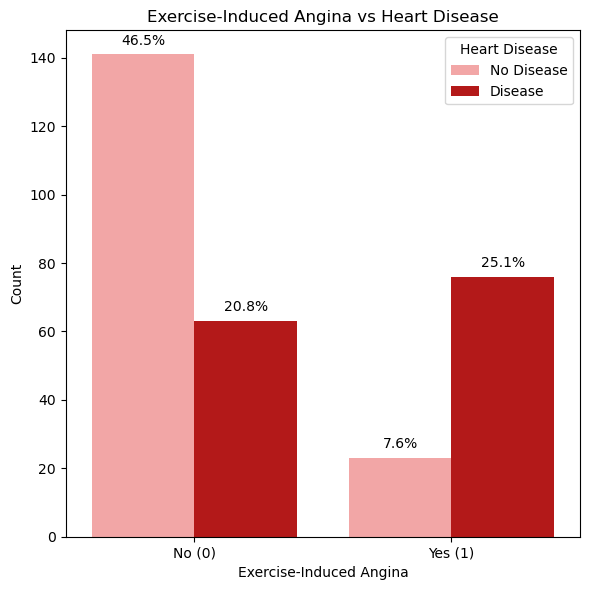

In [13]:
# Exercise-Induced Angina vs Heart Disease
exang_col = "Exercise-induced angina (1=yes, 0=no)"

plt.figure(figsize=(6,6))
ax = sns.countplot(
    data=df,
    x=exang_col,
    hue="Heart Disease Label",
    palette=["#FF9999", "#CC0000"]
)

plt.title("Exercise-Induced Angina vs Heart Disease")
plt.xlabel("Exercise-Induced Angina")
plt.ylabel("Count")

tick_labels = ["No (0)", "Yes (1)"]
ax.set_xticks(range(len(tick_labels)))
ax.set_xticklabels(tick_labels)

add_percentages(ax)
plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

**Analysis:** Patients with exercise-induced angina have a much higher likelihood of heart disease compared to those without.

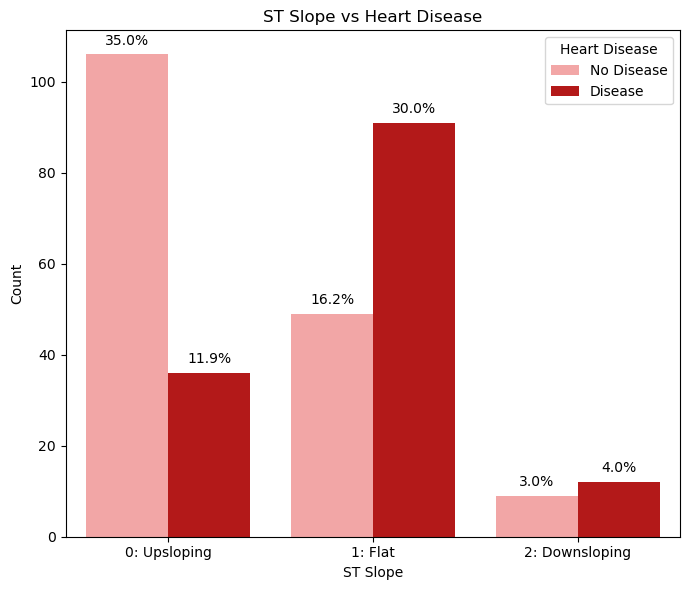

In [14]:
# ST Slope vs Heart Disease
slope_col = "Slope of the peak exercise ST segment (0–2)"

plt.figure(figsize=(7,6))
ax = sns.countplot(
    data=df,
    x=slope_col,
    hue="Heart Disease Label",
    palette=["#FF9999", "#CC0000"]
)

plt.title("ST Slope vs Heart Disease")
plt.xlabel("ST Slope")
plt.ylabel("Count")

tick_labels = ["0: Upsloping", "1: Flat", "2: Downsloping"]
ax.set_xticks(range(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation=0)

add_percentages(ax)
plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

**Analysis:** A flat or downsloping ST segment is associated with a higher prevalence of heart disease, while an upsloping ST is more common in healthy patients.

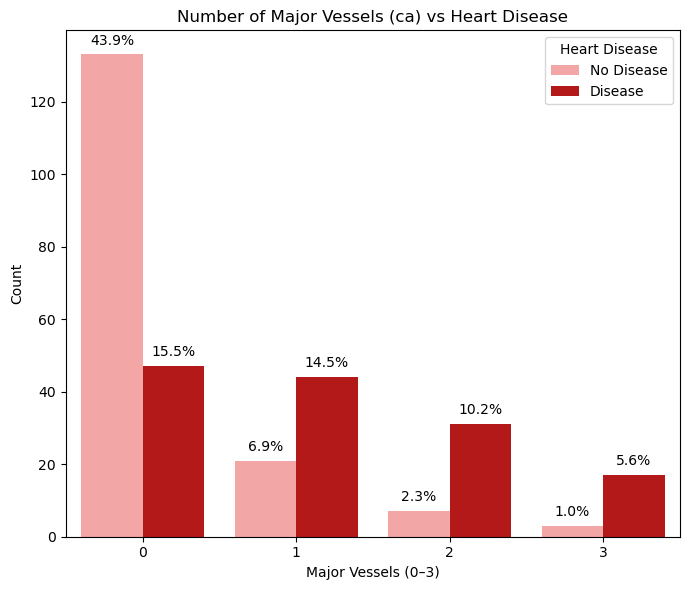

In [15]:
# Number of Major Vessels vs Heart Disease
ca_col = "Number of major vessels (0–3) colored by fluoroscopy"

plt.figure(figsize=(7,6))
ax = sns.countplot(
    data=df,
    x=ca_col,
    hue="Heart Disease Label",
    palette=["#FF9999", "#CC0000"]
)

plt.title("Number of Major Vessels (ca) vs Heart Disease")
plt.xlabel("Major Vessels (0–3)")
plt.ylabel("Count")

# Note: if data only has 0/1/2 values, extra labels just won’t be used
tick_labels = ["0", "1", "2", "3"]
ax.set_xticks(range(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation=0)

add_percentages(ax)
plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

**Analysis:** As the number of major vessels increases, the likelihood of heart disease decreases significantly.

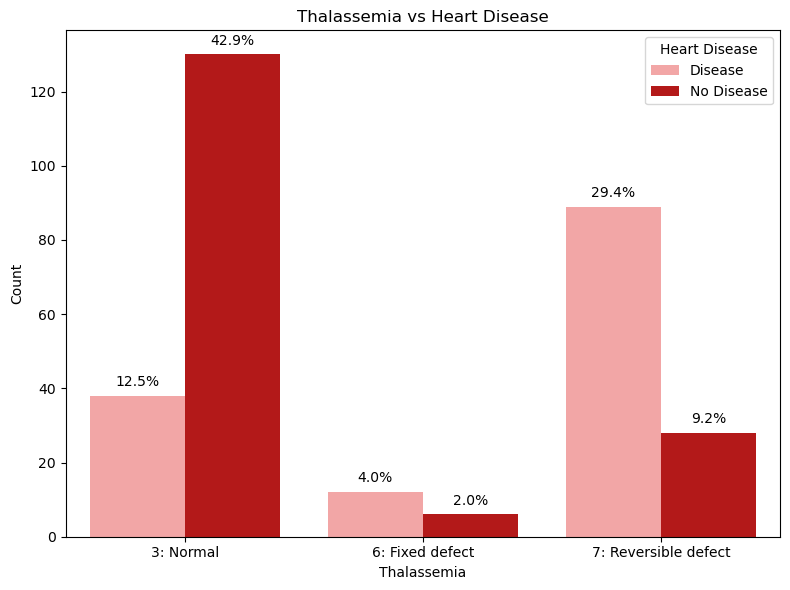

In [16]:
# Thalassemia vs Heart Disease
thal_col = "Thalassemia (3=normal, 6=fixed defect, 7=reversible defect)"

plt.figure(figsize=(8,6))
ax = sns.countplot(
    data=df,
    x=thal_col,
    hue="Heart Disease Label",
    palette=["#FF9999", "#CC0000"]
)

plt.title("Thalassemia vs Heart Disease")
plt.xlabel("Thalassemia")
plt.ylabel("Count")

tick_labels = ["3: Normal", "6: Fixed defect", "7: Reversible defect"]
ax.set_xticks(range(len(tick_labels)))
ax.set_xticklabels(tick_labels, rotation=0)

add_percentages(ax)
plt.legend(title="Heart Disease")
plt.tight_layout()
plt.show()

**Analysis:** Patients with reversible thalassemia defects are more likely to have heart disease, while those with normal thalassemia mostly do not.

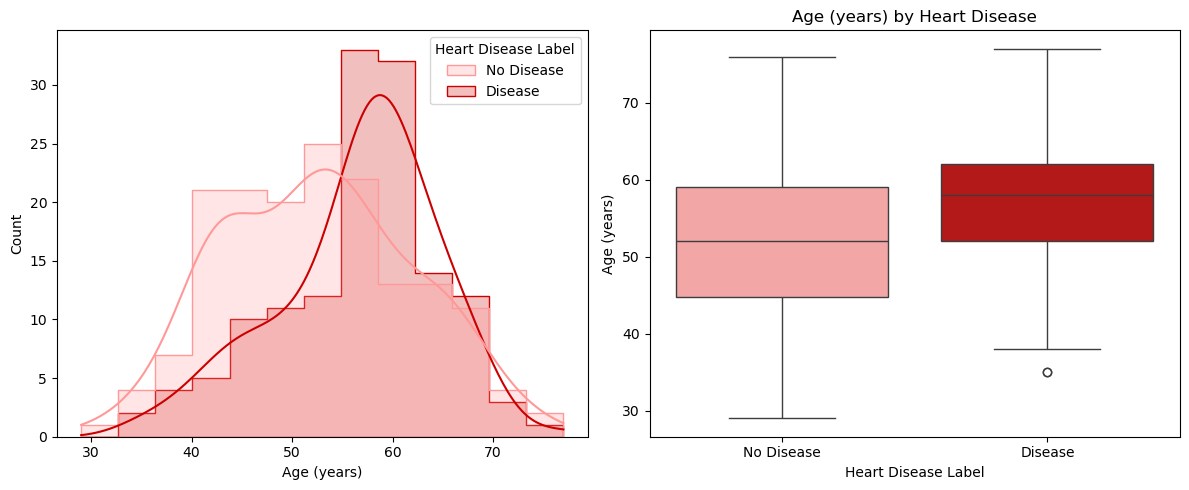

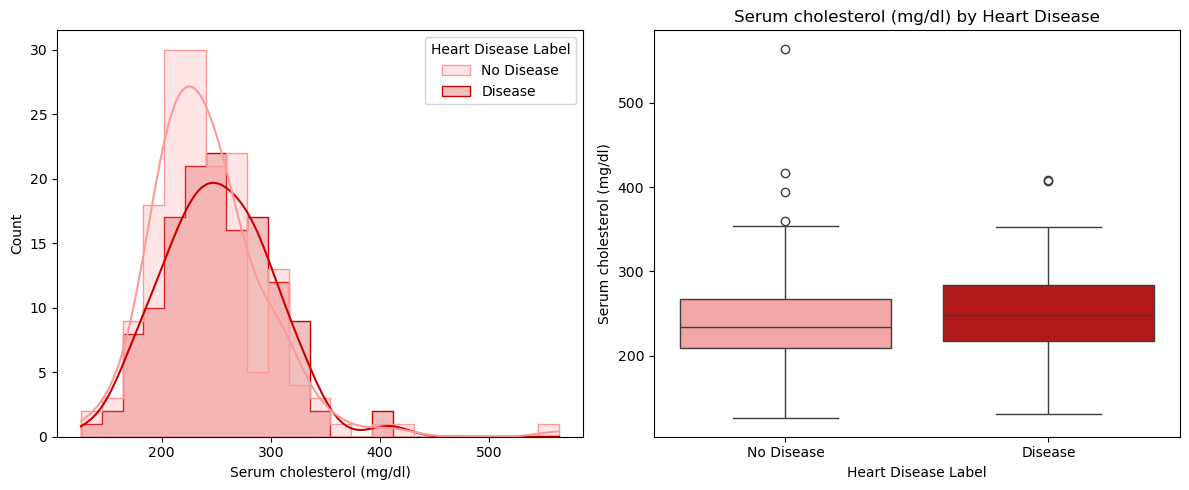

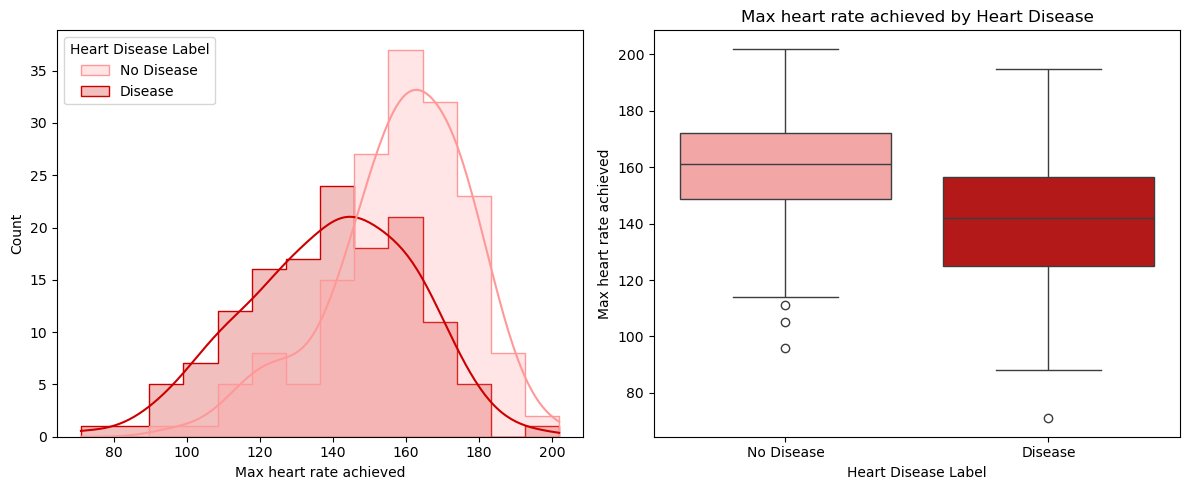

In [17]:
#Numeric Distrubutions (Histogrm + Boxplot)

num_cols=[
    "Age (years)",
    "Serum cholesterol (mg/dl)",
    "Max heart rate achieved"
]

for col in num_cols:
    plt.figure(figsize=(12,5))

    #Histogram
    plt.subplot(1,2,1)
    sns.histplot(
        data=df,
        x=col,
        hue="Heart Disease Label",
        kde=True,
        palette=["#FF9999", "#CC0000"],
        element="step"
    )

    #Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(
    data=df,
    x="Heart Disease Label",
    y=col,
    hue="Heart Disease Label",
    dodge=False,
    palette=["#FF9999", "#CC0000"],
    legend=False
    )

    plt.title(f"{col} by Heart Disease")

    plt.tight_layout()
    plt.show()

**Analysis:** Younger patients tend to achieve higher max heart rates, and lower age + higher max heart rate is often linked with no heart disease.

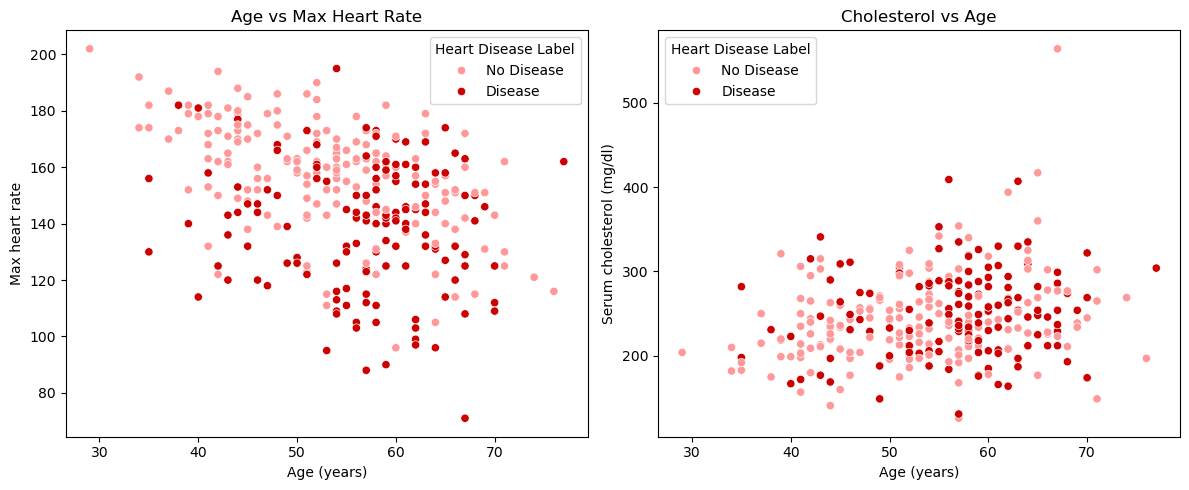

In [18]:
#Scatter subplots (Age vs Max HR, Cholesterol vs Age)

if "Heart Disease Label" not in df.columns and "Diagnosis of heart disease (1=disease, 0no disease)" in df.columns:
        df["Heart Disease Label"] = df["Diagnosis of heart disease (1=disease, 0=no disease)"].map({0:"No Disease", 1:"Disease"})

plt.figure(figsize=(12,5))
# Left: Age cv Max heart rate
plt.subplot(1,2,1)
sns.scatterplot(
    data=df,
    x="Age (years)",
    y="Max heart rate achieved",
    hue="Heart Disease Label",
    palette=["#FF9999", "#CC0000"]
)

plt.title("Age vs Max Heart Rate")
plt.xlabel("Age (years)")
plt.ylabel("Max heart rate")

# Right: Cholestrol vs Age
plt.subplot(1,2,2)
sns.scatterplot(
    data=df,
    x="Age (years)",
    y="Serum cholesterol (mg/dl)",
    hue="Heart Disease Label",
    palette=["#FF9999", "#CC0000"],
    legend=True
)

plt.title("Cholesterol vs Age")
plt.xlabel("Age (years)")
plt.ylabel("Serum cholesterol (mg/dl)")

plt.tight_layout()
plt.show()

**Analysis:** Younger patients tend to achieve higher max heart rates, and lower age + higher max heart rate is often linked with no heart disease.

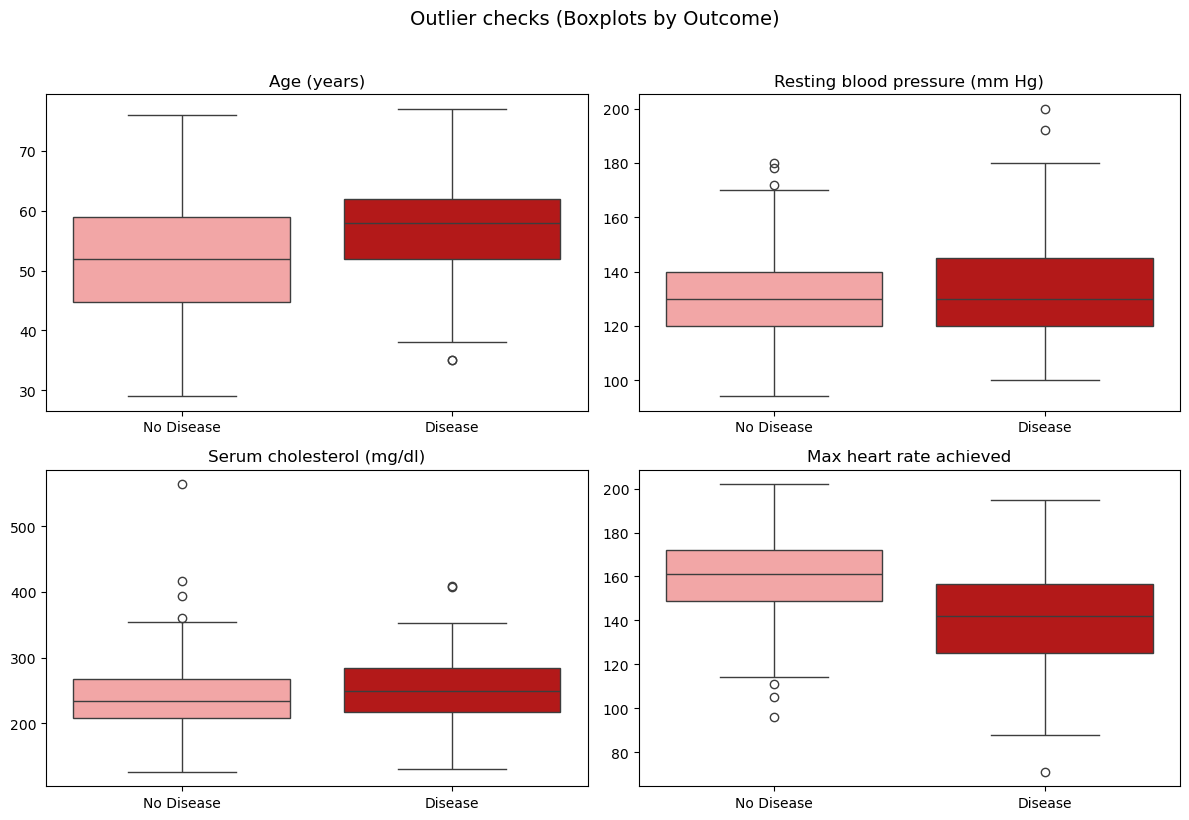

In [19]:
# Outlier checks via boxplots

num_cols = [
    "Age (years)",
    "Resting blood pressure (mm Hg)",
    "Serum cholesterol (mg/dl)",
    "Max heart rate achieved"
]

plt.figure(figsize=(12,8))

for i, col in enumerate(num_cols, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(
        data=df,
        x="Heart Disease Label",
        y=col,
        hue="Heart Disease Label",
        dodge=False, #single box per group
        legend=False,
        palette=["#FF9999", "#CC0000"]
    )
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")

plt.suptitle("Outlier checks (Boxplots by Outcome)", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

**Analysis:** Some patients show extremely high cholesterol and blood pressure values, but these do not strongly separate disease vs no disease groups.

In [20]:
#Feature summary (mean ± std by outcome)

numeric_df = df.select_dtypes(include="number").copy()

summary = (
    df.groupby("Heart Disease Label")[numeric_df.columns]
    .agg(['mean', 'std'])
    .round(2)
)
summary


Age (years)       Sex (1=male, 0=female)        \
                           mean   std                   mean   std   
Heart Disease Label                                                  
Disease                   56.63  7.94                   0.82  0.39   
No Disease                52.59  9.51                   0.56  0.50   

                    Chest pain type (0=typ angina, 1=atyp angina, 2=non-anginal, 3=asymptomatic)  \
                                                                                            mean   
Heart Disease Label                                                                                
Disease                                                           2.59                             
No Disease                                                        1.79                             

                          Resting blood pressure (mm Hg)         \
                      std                           mean    std   
Heart Disease Label                                               
Disease              0.82                         134.57  18.77   
No Disease           0.92                         129.25  16.20   

                    Serum cholesterol (mg/dl)         ...  \
                                         mean    std  ...   
Heart Disease Label                                   ...   
Disease                                251.47  49.49  ...   
No Disease                             242.64  53.46  ...   

                    ST depression induced by exercise (relative to rest)  \
                                                                    mean   
Heart Disease Label                                                        
Disease                                                           1.57     
No Disease                                                        0.59     

                          Slope of the peak exercise ST segment (0–2)        \
                      std                                        mean   std   
Heart Disease Label                                                           
Disease              1.30                                        0.83  0.56   
No Disease           0.78                                        0.41  0.59   

                    Number of major vessels (0–3) colored by fluoroscopy  \
                                                                    mean   
Heart Disease Label                                                        
Disease                                                           1.13     
No Disease                                                        0.27     

                           \
                      std   
Heart Disease Label         
Disease              1.02   
No Disease           0.63   

                    Thalassemia (3=normal, 6=fixed defect, 7=reversible defect)  \
                                                                           mean   
Heart Disease Label                                                               
Disease                                                           2.37            
No Disease                                                        1.38            

                           \
                      std   
Heart Disease Label         
Disease              0.89   
No Disease           0.76   

                    Diagnosis of heart disease (1=disease, 0=no disease)       
                                                                    mean  std  
Heart Disease Label                                                            
Disease                                                            1.0    0.0  
No Disease                                                         0.0    0.0  

[2 rows x 28 columns]

**Analysis:** On average, patients with heart disease are older, have lower max heart rate, and show higher ST depression compared to healthy patients.

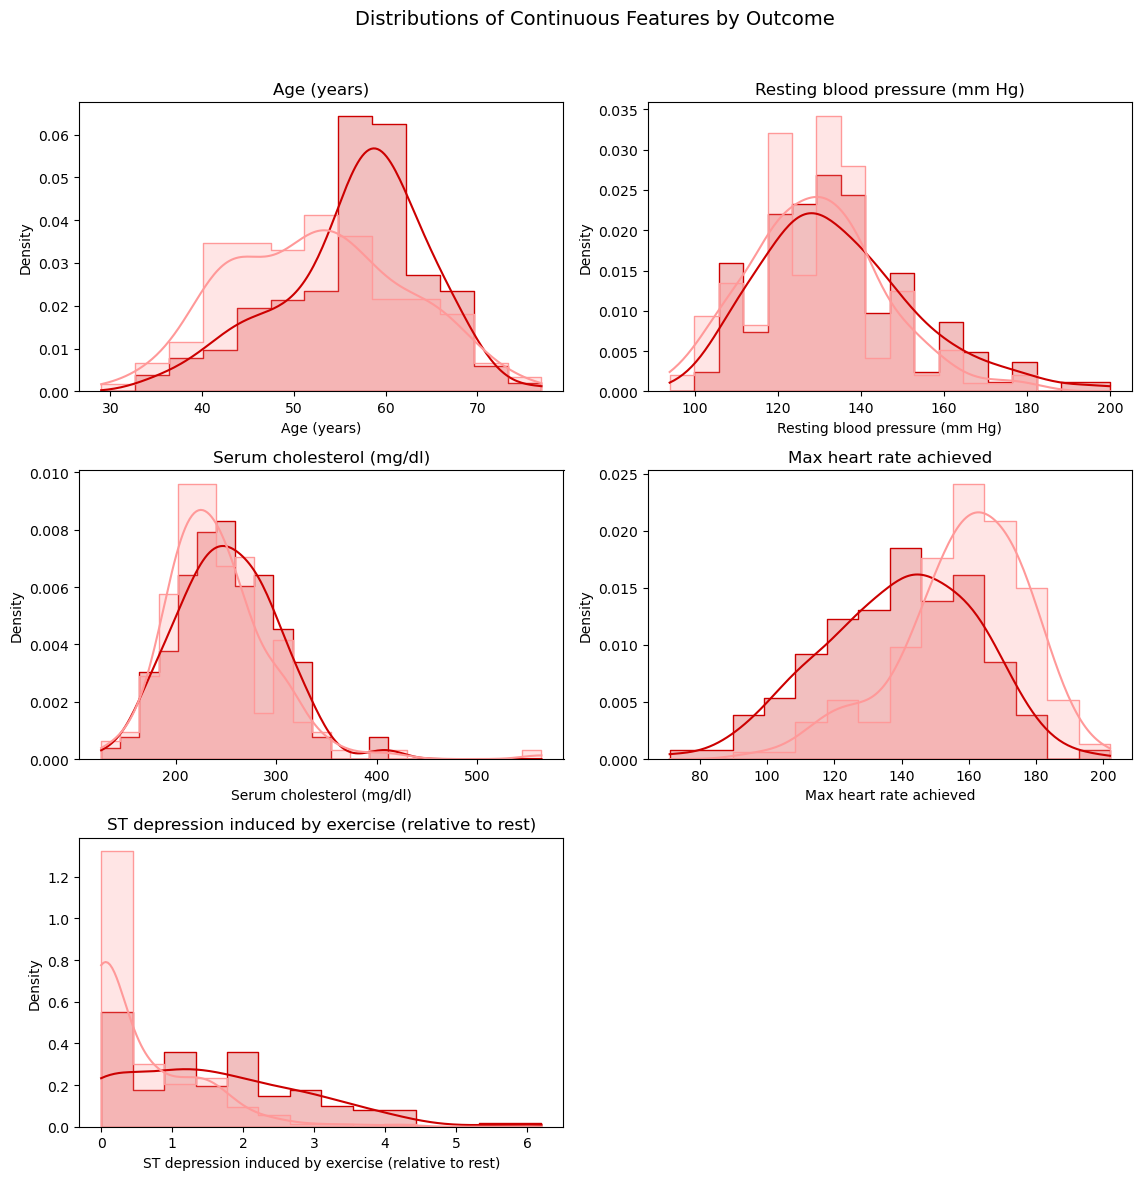

In [21]:
#  Continuous feature distributions, split by outcome 

# only if needed
# df["Heart Disease Label"] = df["Diagnosis of heart disease (1=disease, 0=no disease)"].map({0:"No Disease", 1:"Disease"})
from math import ceil

cont_cols = [
    "Age (years)",
    "Resting blood pressure (mm Hg)",
    "Serum cholesterol (mg/dl)",
    "Max heart rate achieved",
    "ST depression induced by exercise (relative to rest)",
]

rows, cols = (ceil(len(cont_cols)/2), 2)
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
axes = np.array(axes).reshape(-1)

handles, labels = None, None

for i, (ax, col) in enumerate(zip(axes, cont_cols)):
    g = sns.histplot(
        data=df, x=col, hue="Heart Disease Label",
        kde=True, element="step", stat="density",
        common_norm=False, legend=False, ax=ax,palette=["#FF9999", "#CC0000"]
    )
    ax.set_title(col, fontsize=12)
    ax.set_xlabel(col); ax.set_ylabel("Density")

    # capture legend once
    if handles is None:
        h, l = g.get_legend_handles_labels()
        if l:
            handles, labels = h, l

# remove any unused axes if list is shorter than grid
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# single global legend (if captured)
if labels:
    fig.legend(handles, labels, title="Outcome", loc="upper right", bbox_to_anchor=(0.98, 0.98))

fig.suptitle("Distributions of Continuous Features by Outcome", fontsize=14, y=0.98)
plt.tight_layout(rect=[0, 0, 0.96, 0.96])
plt.show()

**Analysis:** Age, resting BP, and cholesterol show broad spreads with visible outliers; patients without disease tend to have higher max heart rate and lower ST depression, while patients with disease skew toward lower max heart rate and higher ST depression. These patterns support including `thalach` and `oldpeak` as potentially strong predictors.

In [22]:
#  Quick numeric wrap-up for the report 
# Class balance
balance = df["Heart Disease Label"].value_counts(normalize=True).mul(100).round(1).to_dict()

target_num_col = "Diagnosis of heart disease (1=disease, 0=no disease)"

# Top correlations with numeric target
corr = df.select_dtypes(include=[np.number]).corr()
top = (
    corr[target_num_col]
    .drop(labels=[target_num_col])
    .sort_values(key=lambda s: s.abs(), ascending=False)
)

top5 = top.head(5).round(2)

print("Class balance (%):", balance)
print("\nTop 5 |correlation| with target:")
print(top5)

Class balance (%): {'No Disease': 54.1, 'Disease': 45.9}

Top 5 |correlation| with target:
Thalassemia (3=normal, 6=fixed defect, 7=reversible defect)    0.52
Number of major vessels (0–3) colored by fluoroscopy           0.46
Exercise-induced angina (1=yes, 0=no)                          0.43
ST depression induced by exercise (relative to rest)           0.42
Max heart rate achieved                                       -0.42
Name: Diagnosis of heart disease (1=disease, 0=no disease), dtype: float64


### Key EDA Findings

- **Class balance:** The dataset is roughly balanced between disease and no-disease classes, which is suitable for classification.
- **Strong signals:** Chest pain type, ST slope, number of vessels, ST depression, and max heart rate show the clearest separation by outcome.
- **Weaker signals:** Fasting blood sugar and total cholesterol show weak direct relationships to the target and may contribute less to the model.
- **Outliers:** Cholesterol and resting BP contain high-end outliers; consider robust scaling or tree-based models that are less sensitive.
- **Next step (ML prep):** One-hot encode categorical features (cp, restecg, slope, thal), keep numerics as-is (or standardize for linear models), train/validation split, then baseline models (LogReg, RF, XGB) with cross-validation.

# Machine Learning Preparation

Machine Learning (ML) is a branch of Artificial Intelligence that allows systems to learn from data and make predictions without explicit programming.  

**In Healthcare, ML can:**  
- Predict risk of heart disease (our project goal)  
- Detect diseases from medical images  
- Forecast hospital readmissions  
- Support personalized treatment decisions  

#### Model Selection  
We compare Logistic Regression, Random Forest, and KNN to balance simplicity, predictive power, and different modeling approaches for heart disease prediction.  

#### Logistic Regression  
A simple and interpretable baseline model for binary classification that estimates the probability of heart disease.  

In [23]:
# Logistic Regression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define target (numeric 0/1)
y = df["Diagnosis of heart disease (1=disease, 0=no disease)"]

# Define features (drop target + label col)
X = df.drop(columns=[
    "Diagnosis of heart disease (1=disease, 0=no disease)",
    "Heart Disease Label"
], errors="ignore")

# Only numeric features
X = X.select_dtypes(include=["number"])

# Quick sanity check before splitting/training
print("Numeric feature columns:", list(X.columns))
print("X shape:", X.shape)
display(X.head())



Numeric feature columns: ['Age (years)', 'Sex (1=male, 0=female)', 'Chest pain type (0=typ angina, 1=atyp angina, 2=non-anginal, 3=asymptomatic)', 'Resting blood pressure (mm Hg)', 'Serum cholesterol (mg/dl)', 'Fasting blood sugar > 120 mg/dl (1=true, 0=false)', 'Resting ECG results (0–2)', 'Max heart rate achieved', 'Exercise-induced angina (1=yes, 0=no)', 'ST depression induced by exercise (relative to rest)', 'Slope of the peak exercise ST segment (0–2)', 'Number of major vessels (0–3) colored by fluoroscopy', 'Thalassemia (3=normal, 6=fixed defect, 7=reversible defect)']
X shape: (303, 13)


,Age (years),"Sex (1=male, 0=female)","Chest pain type (0=typ angina, 1=atyp angina, 2=non-anginal, 3=asymptomatic)",Resting blood pressure (mm Hg),Serum cholesterol (mg/dl),"Fasting blood sugar > 120 mg/dl (1=true, 0=false)",Resting ECG results (0–2),Max heart rate achieved,"Exercise-induced angina (1=yes, 0=no)",ST depression induced by exercise (relative to rest),Slope of the peak exercise ST segment (0–2),Number of major vessels (0–3) colored by fluoroscopy,"Thalassemia (3=normal, 6=fixed defect, 7=reversible defect)"
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1


**Analysis:** Selected 13 numeric predictor features after dropping the target and label column; data is clean and ready for model training.

# Data Preparation

In [24]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (242, 13)
Test set shape: (61, 13)


**Analysis:** 
We split the data into a training set (80%) and a test set (20%).
The stratify=y ensures that the class distribution (disease vs no disease) is similar in both sets.

In [25]:
# Train logistic regression
log_reg = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

Logistic Regression Accuracy: 86.89 %


LogReg ROC-AUC: 0.949


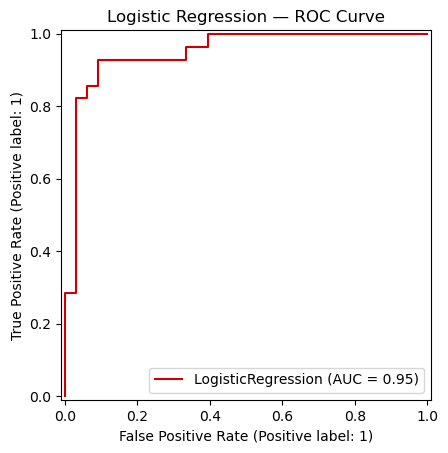

In [26]:
# ROC curve for Logistic Regression
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_proba_log = log_reg.predict_proba(X_test)[:, 1]
print("LogReg ROC-AUC:", round(roc_auc_score(y_test, y_proba_log), 3))

RocCurveDisplay.from_estimator(log_reg, X_test, y_test, color="#CC0000")
plt.title("Logistic Regression — ROC Curve")
plt.show()

**Analysis:** Logistic Regression achieves a strong ROC-AUC score, showing good ability to separate positive (disease) and negative (no disease) cases. The smooth curve reflects the model’s linear decision boundary.

### Logistic Regression — Analysis
- **Accuracy:** 86.9%
- As a linear baseline, it captures general trends but misses some non-linear patterns.
- This serves as a benchmark — future models should aim to improve upon this accuracy while also balancing false positives and false negatives.  


#### Random Forest  
An ensemble of decision trees that captures non-linear patterns and reduces overfitting, offering strong predictive power.  

In [27]:
# Random Forest 


# Train random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,          # light tuning: limit depth for better generalization
    min_samples_split=5,  # avoid overfitting small splits
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=5, n_estimators=300, n_jobs=-1,
                       random_state=42)

**Analysis:** A balanced Random Forest with 300 trees and depth limited to 8 has been trained; these settings help improve generalization and prevent overfitting.  

In [28]:
from sklearn.metrics import accuracy_score

y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", round(rf_acc*100, 2), "%")

Random Forest Accuracy: 90.16 %


**Analysis:** The Random Forest model achieved about 90% accuracy. This suggests strong predictive power, but accuracy alone may hide false negatives, which are critical in heart disease detection.

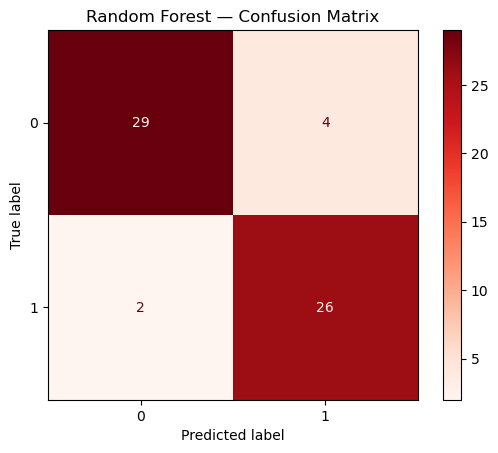

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap="Reds")
plt.title("Random Forest — Confusion Matrix")
plt.show()

**Analysis:** The confusion matrix shows the Random Forest correctly classified most cases (29 no-disease and 26 disease). Only 6 total misclassifications occurred (4 false positives, 2 false negatives), indicating balanced performance across both classes.  

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf, target_names=["No Disease","Disease"]))

              precision    recall  f1-score   support

  No Disease       0.94      0.88      0.91        33
     Disease       0.87      0.93      0.90        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



**Analysis:** Random Forest achieved balanced performance with precision and recall around 0.90 for both classes, meaning it is equally good at detecting disease and non-disease cases, with an overall accuracy of 90%.  

ROC-AUC: 0.957


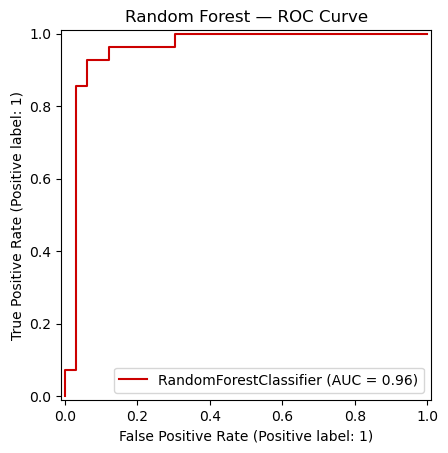

In [31]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_proba_rf = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC:", round(auc, 3))

RocCurveDisplay.from_estimator(rf, X_test, y_test, color="#CC0000")
plt.title("Random Forest — ROC Curve")
plt.show()

**Analysis:** The ROC curve and AUC indicate the model separates disease vs no disease cases effectively. AUC above 0.80 suggests strong discrimination ability.

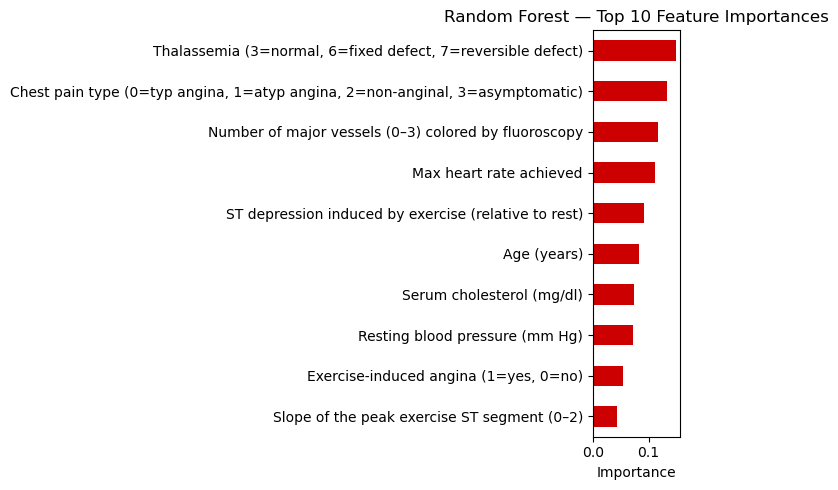

,Importance
"Thalassemia (3=normal, 6=fixed defect, 7=reversible defect)",0.149
"Chest pain type (0=typ angina, 1=atyp angina, 2=non-anginal, 3=asymptomatic)",0.133
Number of major vessels (0–3) colored by fluoroscopy,0.118
Max heart rate achieved,0.112
ST depression induced by exercise (relative to rest),0.092
Age (years),0.082
Serum cholesterol (mg/dl),0.075
Resting blood pressure (mm Hg),0.071
"Exercise-induced angina (1=yes, 0=no)",0.055
Slope of the peak exercise ST segment (0–2),0.044


In [32]:
import pandas as pd

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top10 = importances.sort_values(ascending=False).head(10)

ax = top10[::-1].plot(kind="barh", figsize=(7,5),color="#CC0000")
ax.set_title("Random Forest — Top 10 Feature Importances")
ax.set_xlabel("Importance")
plt.tight_layout()
plt.show()

display(top10.to_frame("Importance").round(3))

**Analysis:** The Random Forest identifies **Thalassemia**, **Chest pain type**, and **Number of major vessels** as the strongest predictors of heart disease, followed by exercise-related measures like max heart rate and ST depression. This aligns with clinical intuition, showing both genetic and exercise-induced factors play a key role.  

**Note:** Tree models can over-emphasize ordinal-encoded variables; for strictly nominal categories, one-hot encoding is usually preferred.

### Random Forest — Analysis
- **Accuracy:** 90.2%
- **Precision/Recall/F1:** balanced at ~0.90 for both classes.
- **ROC-AUC:** 0.96 → excellent separation between disease and no-disease.
- Random Forest clearly improves over Logistic Regression and highlights key predictors via feature importance.


#### K-Nearest Neighbors (KNN)  
An instance-based model that classifies a patient by looking at the closest examples in the training data.  

In [33]:
#KNN-1 — Train KNN model

from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn_pipe = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [34]:
# Evaluate KNN model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn_pipe.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 3))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.902

Confusion Matrix:
[[27  6]
 [ 0 28]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        33
           1       0.82      1.00      0.90        28

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61



**Analysis:** KNN reached 90.2% accuracy. It perfectly identified all disease cases (recall = 1.00) but misclassified 6 no-disease cases, giving lower recall (0.82) for that class. This trade-off favors sensitivity, reducing the chance of missing true heart disease patients.  

KNN ROC-AUC: 0.924


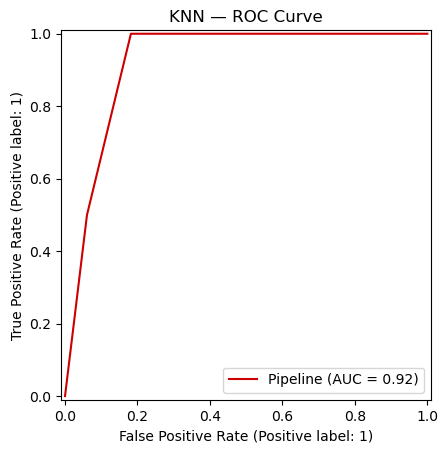

In [35]:
# ROC curve for KNN
y_proba_knn = knn_pipe.predict_proba(X_test)[:, 1]
print("KNN ROC-AUC:", round(roc_auc_score(y_test, y_proba_knn), 3))

RocCurveDisplay.from_estimator(knn_pipe, X_test, y_test, color="#CC0000")
plt.title("KNN — ROC Curve")
plt.show()

**Analysis:** KNN also shows a high ROC-AUC, confirming that it captures non-linear patterns in the data. Its performance is close to Random Forest, though KNN may be more sensitive to scaling and neighborhood choice.

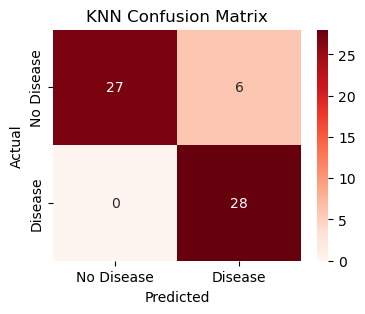

In [36]:
# KNN-3 — Visualize confusion matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

**Analysis:** The confusion matrix confirms KNN detected all 28 disease cases correctly but misclassified 6 out of 33 no-disease cases, reinforcing its strength in recall for disease at the cost of some false alarms.  


### K-Nearest Neighbors (KNN, k=5) — Analysis
- **Accuracy:** 90.2%
- **Confusion Matrix:**  
  - True negatives (No Disease correctly predicted): 27  
  - False positives (No Disease misclassified as Disease): 6  
  - True positives (Disease correctly predicted): 28  
  - False negatives: 0  
- **Precision/Recall:**  
  - No Disease → precision 1.00, recall 0.82  
  - Disease → precision 0.82, recall 1.00  
- Strong recall for Disease means it rarely misses heart disease cases, which is valuable in a medical context.

### Conclusion
- Logistic Regression is a good interpretable baseline.  
- Random Forest and KNN both achieved ~90% accuracy and strong precision/recall.  
- Random Forest provides feature importance, making it easier to explain drivers of prediction.  
- KNN complements by showing an instance-based, distance-driven approach.  
- For deployment or real-world use, Random Forest would likely be preferred due to interpretability and stability.

In [37]:
# Model Comparison Table in code

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# collect predictions
y_pred_log = log_reg.predict(X_test)   # logistic regression
y_pred_rf = rf.predict(X_test)         # random forest (trained as 'rf')
y_pred_knn = knn_pipe.predict(X_test)  # KNN



# helper function
def get_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": round(accuracy_score(y_true, y_pred), 3),
        "Precision": round(precision_score(y_true, y_pred, average="macro"), 3),
        "Recall": round(recall_score(y_true, y_pred, average="macro"), 3),
        "F1-score": round(f1_score(y_true, y_pred, average="macro"), 3)
    }

results = []
results.append(get_metrics(y_test, y_pred_log, "Logistic Regression"))
results.append(get_metrics(y_test, y_pred_rf, "Random Forest"))
results.append(get_metrics(y_test, y_pred_knn, "KNN (k=5)"))

df_results = pd.DataFrame(results)
display(df_results)

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.869,0.872,0.873,0.869
1,Random Forest,0.902,0.901,0.904,0.901
2,KNN (k=5),0.902,0.912,0.909,0.902


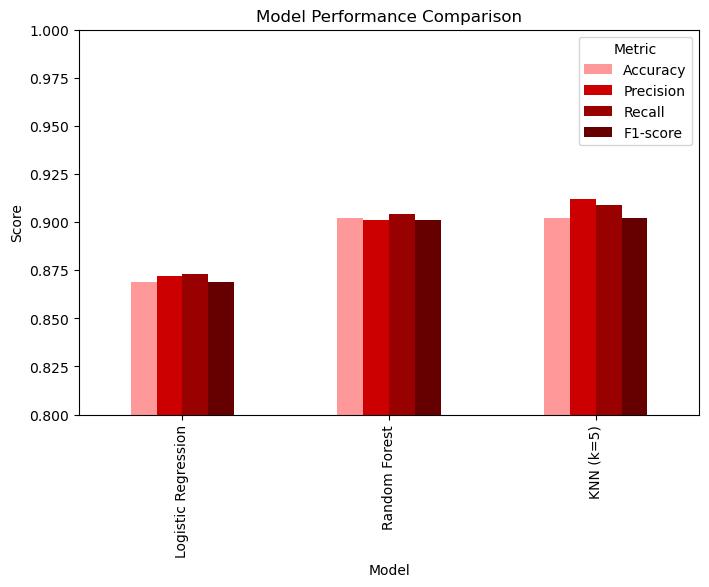

In [38]:
# Step 2 — Plot results
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# enforce consistent metric order
metrics_order = ["Accuracy", "Precision", "Recall", "F1-score"]
df_results = df_results[["Model"] + metrics_order]

df_results.set_index("Model")[metrics_order].plot(kind="bar", figsize=(8, 5), color=["#FF9999", "#CC0000", "#990000", "#660000"])
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.legend(title="Metric")
plt.show()

### Interpretation of Model Comparison Plot

- **Overall Performance:**  
  All three models (Logistic Regression, Random Forest, KNN) perform well, with scores above 0.85 across metrics.

- **Logistic Regression:**  
  Slightly lower accuracy compared to the others (~87%). Serves as a reliable linear baseline.

- **Random Forest:**  
  Strong across all metrics (~90%). Provides the added benefit of feature importance, making it easier to interpret key predictors.

- **KNN:**  
  Accuracy and F1-score similar to Random Forest (~90%). Shows very high recall for the Disease class, meaning fewer missed positive cases.

- **Conclusion:**  
  Random Forest and KNN offer the best performance, while Logistic Regression remains useful as a simple, interpretable baseline.

## Conclusion
This project demonstrated how machine learning can be applied to predict heart disease using the Cleveland dataset.  
- Logistic Regression served as a simple, interpretable baseline with ~87% accuracy.  
- Random Forest and KNN both achieved ~90% accuracy, with Random Forest offering feature importance insights and KNN showing perfect recall for disease cases.  
- In healthcare, recall is critical: it is safer to flag potential cases 

## Final Conclusion

**Exploratory Data Analysis (EDA):**  
- The dataset is balanced (≈54% No Disease, 46% Disease).  
- Key features correlated with heart disease include **Thalassemia**, **Number of major vessels**, **Exercise-induced angina**, **ST depression**, and **Max heart rate achieved**.  
- Distributions show clear separation between patients with and without heart disease for several of these variables.

**Modeling:**  
- **Logistic Regression** provided a solid, interpretable baseline with ~87% accuracy.  
- **Random Forest** delivered ~90% accuracy with balanced precision/recall, and revealed feature importance, highlighting the clinical drivers of predictions.  
- **KNN (k=5)** also achieved ~90% accuracy, with excellent recall for detecting heart disease cases, showing its ability to capture local patterns.

**Comparison:**  
- Logistic Regression is best for interpretability.  
- Random Forest is the strongest all-rounder with both performance and explainability.  
- KNN confirms results using a different modeling approach and emphasizes patient-level similarity.

**Takeaway:**  
Heart disease prediction is feasible with high accuracy using classical ML techniques.  
For practical deployment, **Random Forest** is recommended due to its stability, performance, and interpretability, while Logistic Regression and KNN provide valuable baselines and cross-checks.

In a healthcare context, recall is especially critical: it is safer to flag more potential cases (even at the cost of false positives) than to miss a patient with heart disease.  

## Limitations & Next Steps
- Dataset size (303 samples) is relatively small and may limit generalization.  
- Hyperparameter tuning and cross-validation could further improve performance.  
- Future work could include advanced models such as XGBoost, LightGBM, or Support Vector Machines.  

## References
- Detrano, R. et al. (1989). *Cleveland Heart Disease Dataset*. UCI Machine Learning Repository.  
  [https://archive.ics.uci.edu/ml/datasets/Heart+Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)  
- Pedregosa, F. et al. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825–2830.  
- Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning*. Springer.  
